In [1]:
import pandas as pd

df=pd.read_csv('BankChurn.csv')

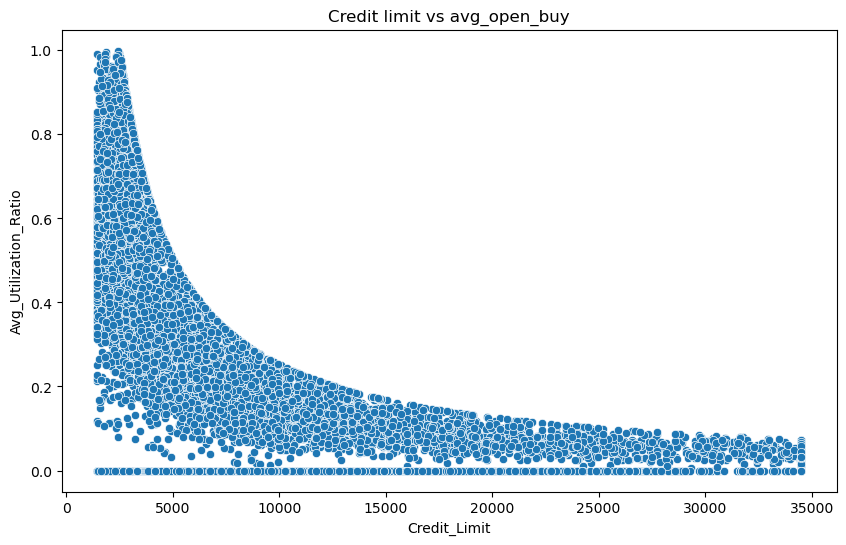

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Credit_Limit'],y=df['Avg_Utilization_Ratio'])
plt.title('Credit limit vs avg_open_buy')
plt.show()

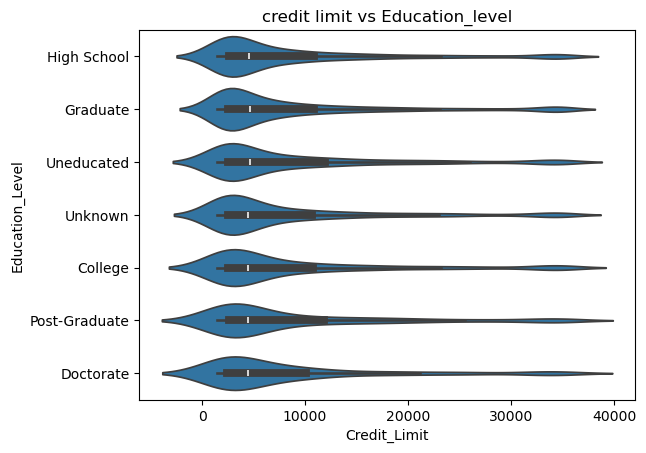

In [3]:
plt.Figure(figsize=(10,6))
sns.violinplot(y=df['Education_Level'],x=df['Credit_Limit'])
plt.title('credit limit vs Education_level')
plt.show()

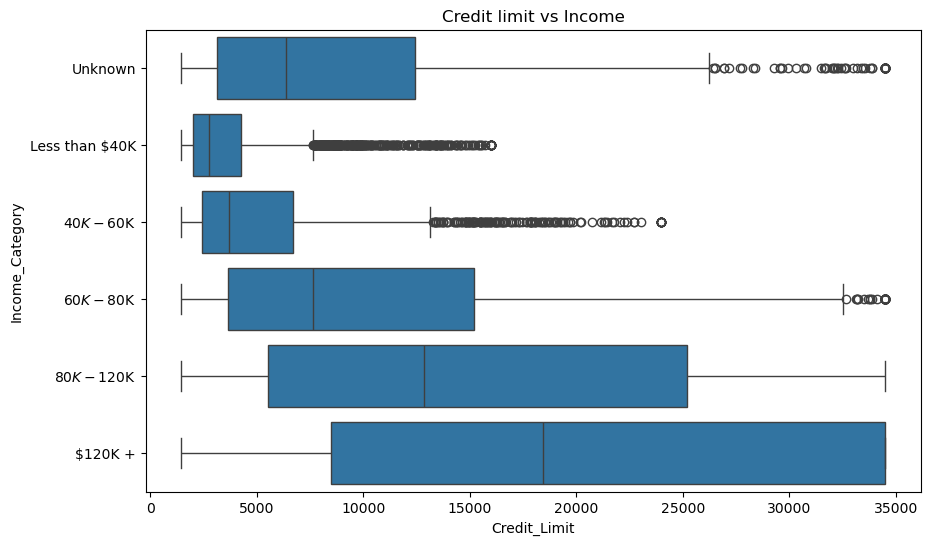

In [4]:
income_order = [
    'Unknown',
    'Less than $40K', 
    '$40K - $60K', 
    '$60K - $80K', 
    '$80K - $120K', 
    '$120K +'
]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Credit_Limit'], y=df['Income_Category'], order=income_order)
plt.title('Credit limit vs Income')
plt.show()

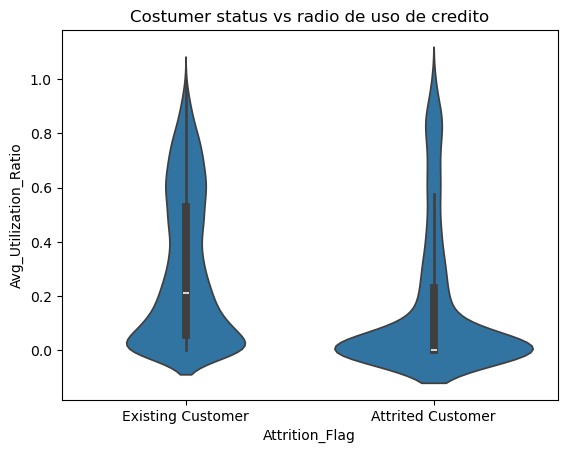

In [5]:
plt.figure()
sns.violinplot(x=df['Attrition_Flag'],y=df['Avg_Utilization_Ratio'])
plt.title('Costumer status vs radio de uso de credito')
plt.show()

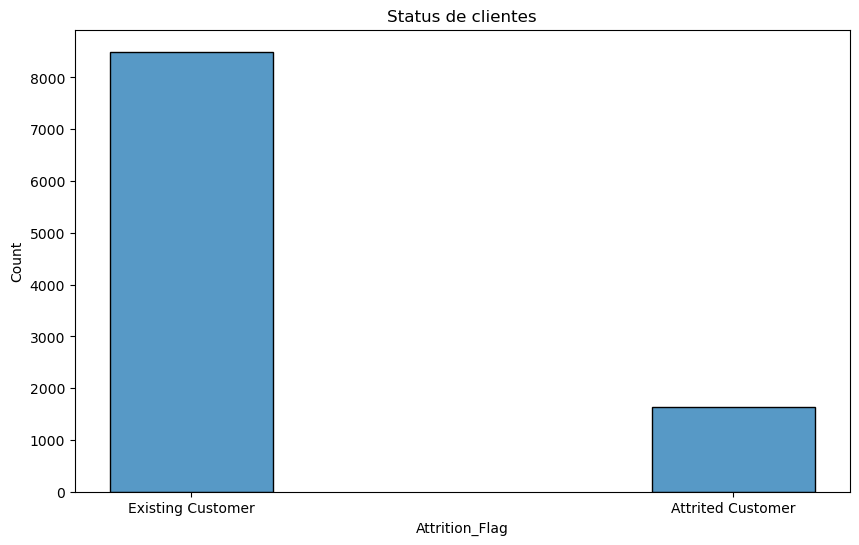

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(df['Attrition_Flag'], shrink=0.3)
plt.title('Status de clientes')
plt.show()

In [7]:
activos=df[df['Attrition_Flag']=='Existing Customer']
inactivos=df[df['Attrition_Flag']=='Attrited Customer']

Text(0, 0.5, 'Total de transacciones')

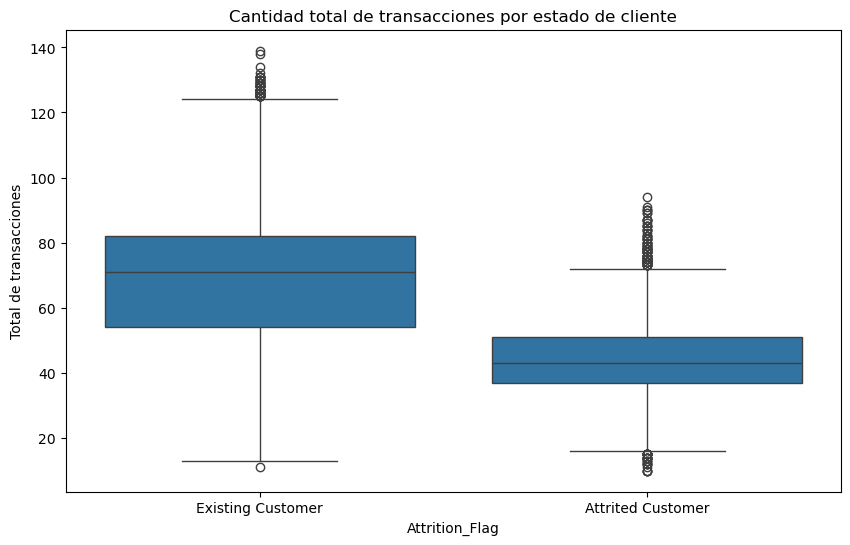

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=df)
plt.title('Cantidad total de transacciones por estado de cliente')
plt.xlabel('Attrition_Flag')
plt.ylabel('Total de transacciones')


Text(0, 0.5, 'Total de comunicaciones')

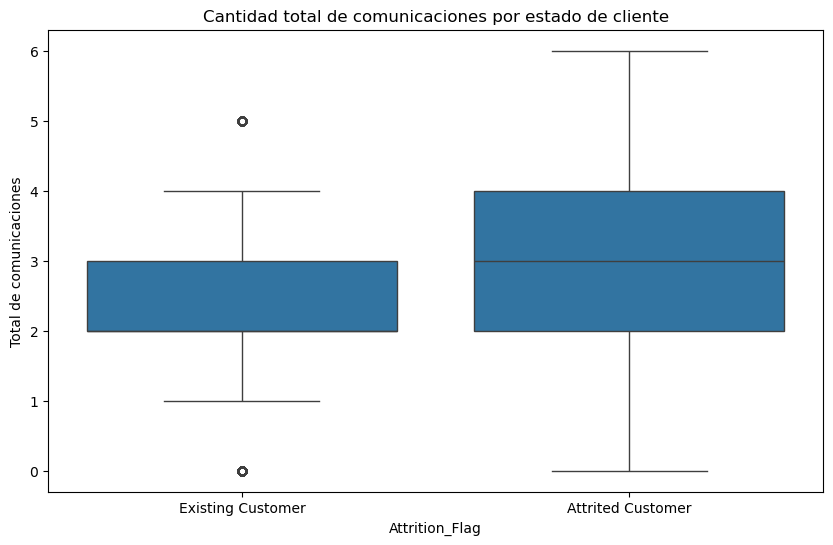

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Attrition_Flag', y='Contacts_Count_12_mon', data=df)
plt.title('Cantidad total de comunicaciones por estado de cliente')
plt.xlabel('Attrition_Flag')
plt.ylabel('Total de comunicaciones')

Text(0, 0.5, 'Total de comunicaciones')

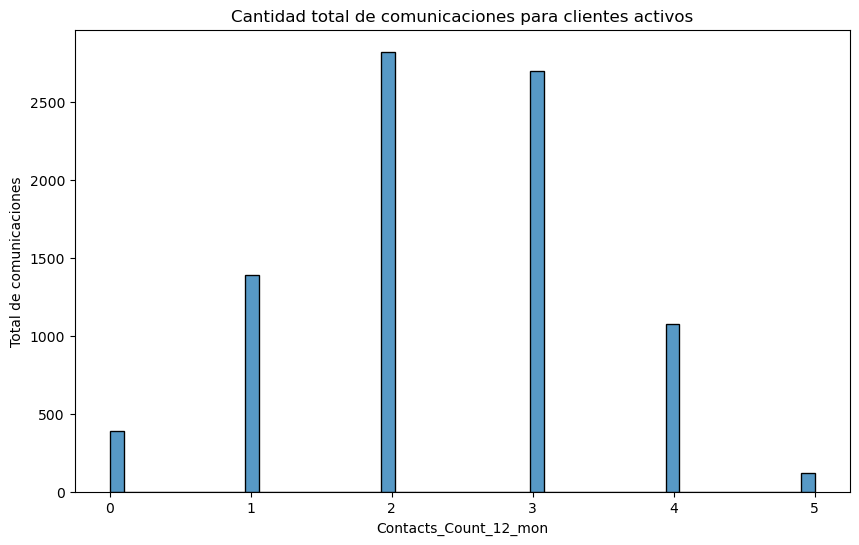

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(activos['Contacts_Count_12_mon'])
plt.title('Cantidad total de comunicaciones para clientes activos')
plt.ylabel('Total de comunicaciones')

Text(0, 0.5, 'Total de comunicaciones')

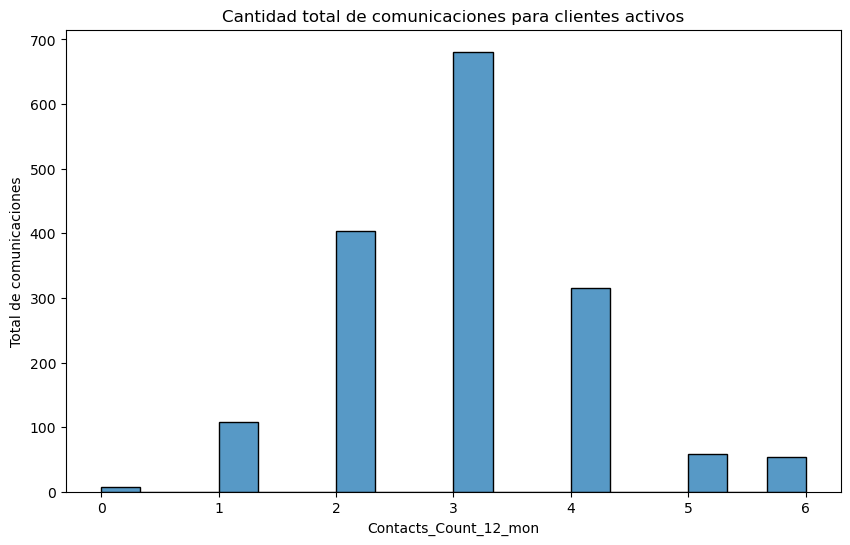

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(inactivos['Contacts_Count_12_mon'])
plt.title('Cantidad total de comunicaciones para clientes activos')
plt.ylabel('Total de comunicaciones')

In [12]:
grouped = df.groupby(['Contacts_Count_12_mon', 'Attrition_Flag']).size().reset_index(name='count')

total_por_estado = grouped.groupby('Attrition_Flag')['count'].transform('sum')

grouped['proportion'] = grouped['count'] / total_por_estado

Text(0.5, 0, 'Status del cliente')

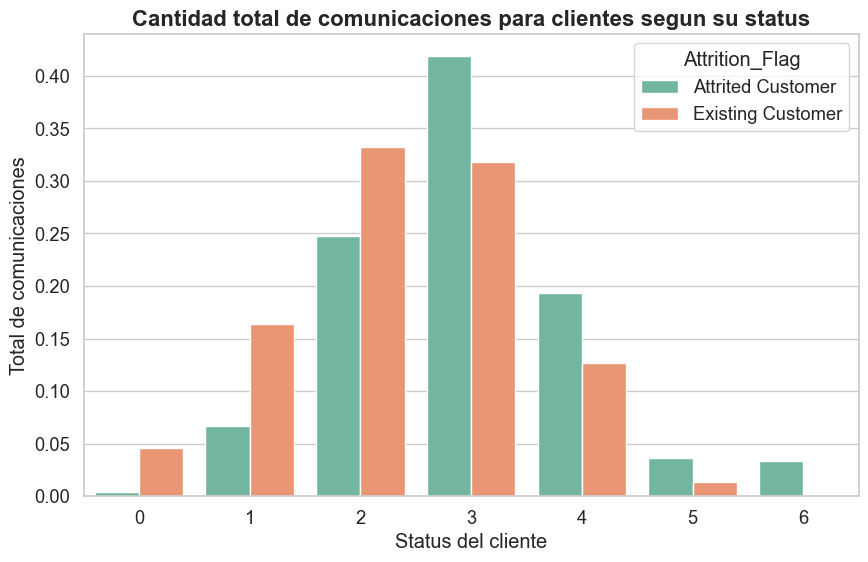

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=grouped,
    x='Contacts_Count_12_mon',
    y='proportion',
    hue='Attrition_Flag',
    palette='Set2'
)

plt.title('Cantidad total de comunicaciones para clientes segun su status', fontsize=16, weight='bold')
plt.ylabel('Total de comunicaciones')
plt.xlabel('Status del cliente')

C:\Users\JESUS\AppData\Local\Temp\ipykernel_34212\378748759.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


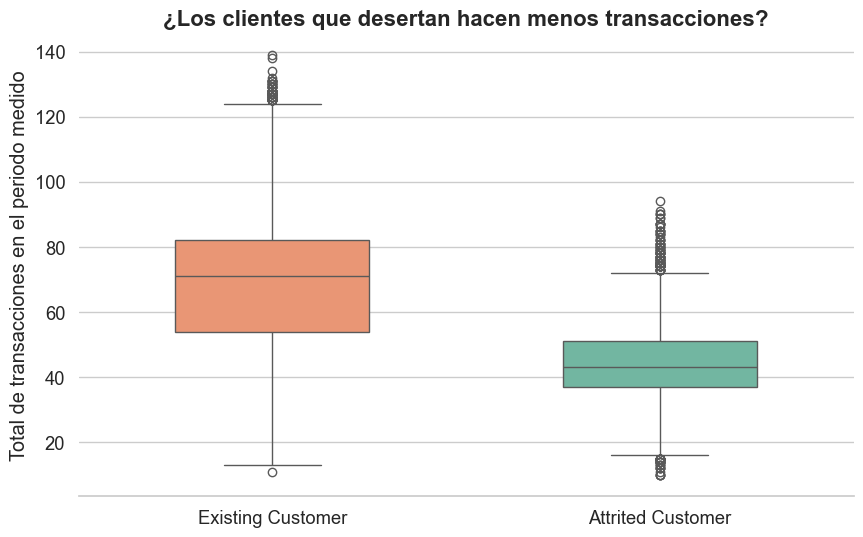

In [ ]:
# Estilo general
sns.set(style='whitegrid', font_scale=1.2)

palette_custom = {
    'Attrited Customer': '#66c2a5', 
    'Existing Customer': '#fc8d62'    
}
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x='Attrition_Flag',
    y='Total_Trans_Ct',
    data=df,
    palette=palette_custom,
    width=0.5
)


plt.title('¿Los clientes que desertan hacen menos transacciones?', fontsize=16, weight='bold')
plt.xlabel('')
plt.ylabel('Total de transacciones en el periodo medido')

sns.despine(left=True)

C:\Users\JESUS\AppData\Local\Temp\ipykernel_34212\3152312207.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


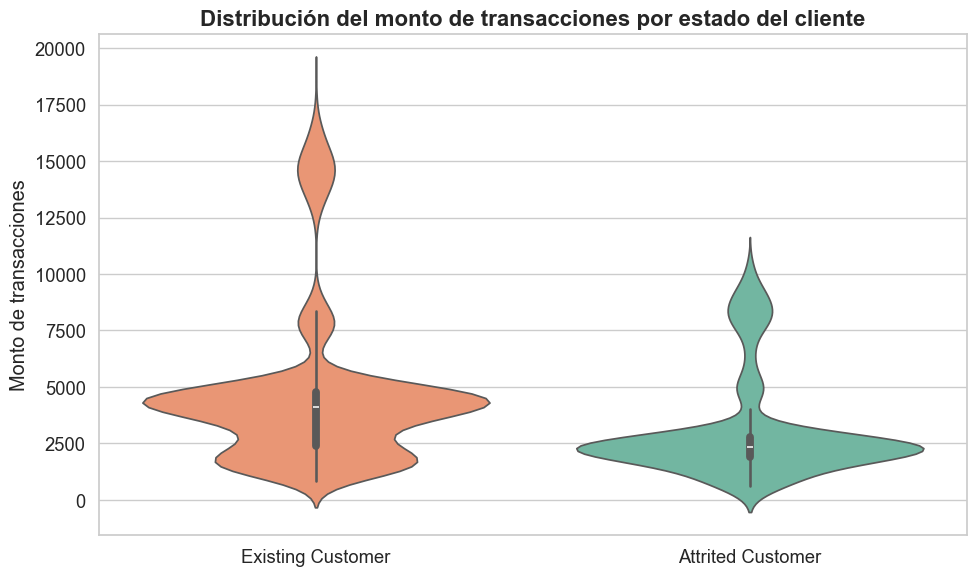

In [ ]:
plt.figure(figsize=(10, 6))
palette_custom = {
    'Attrited Customer': '#66c2a5',
    'Existing Customer': '#fc8d62'  
}
sns.violinplot(
    x='Attrition_Flag',
    y='Total_Trans_Amt',
    data=df,
    palette=palette_custom,
    inner='box'
)
plt.title('Distribución del monto de transacciones por estado del cliente', fontsize=16, weight='bold')
plt.xlabel('')
plt.ylabel('Monto de transacciones')
plt.tight_layout()
plt.show()
